In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
data = pd.read_csv(r'C:\Users\Arvind\Downloads\Documents\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [48]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

###### Our dataset has 1470 rows and 35 columns.

In [8]:
### Checking for null values.
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

###### There is no null values present in our dataset.

In [9]:
### checking data information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

###### No null values in our dataset, Also the columns which shows dtype as "Int64" are contain numeric data and all the columns which shows dtype as "Object" are contain String data

In [12]:
### Checking unqiue value count in our target variable.
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

###### We can see class Imbalance in our target variable. Number of entries for No is 1233 and for Yes 237.

In [13]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

###### We have 3 different classes in Business travel column.

In [14]:
### Lets check data description
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###### data count is looking equal for all the continous column. Means and std difference is fine for all the columns, 
###### We can see there is skewness in our dataset.

#### let's visualize our dataset and to get better understanding about our data.

### (i) Univeriate anaylsis

No     1233
Yes     237
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


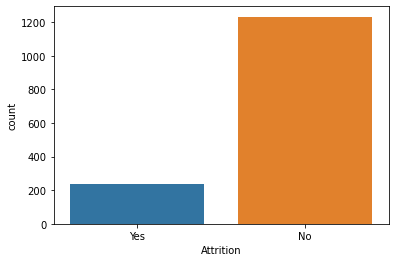

In [20]:
sns.countplot(x='Attrition',data=data)
print(data['Attrition'].value_counts(0))
print(data['Attrition'].value_counts(1))

###### We can see 83% attrition is No and only 16% attrition is Yes, also sees class imbalance problem.

In [21]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


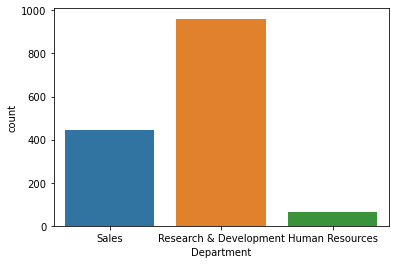

In [23]:
### Checking Departments
sns.countplot(x= 'Department',data=data)
print(data['Department'].value_counts())

###### We can see Research & development has 961 value count and Sales has 446, the least value count is for HR that is 63 This column also shows class Imbalancing issue.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


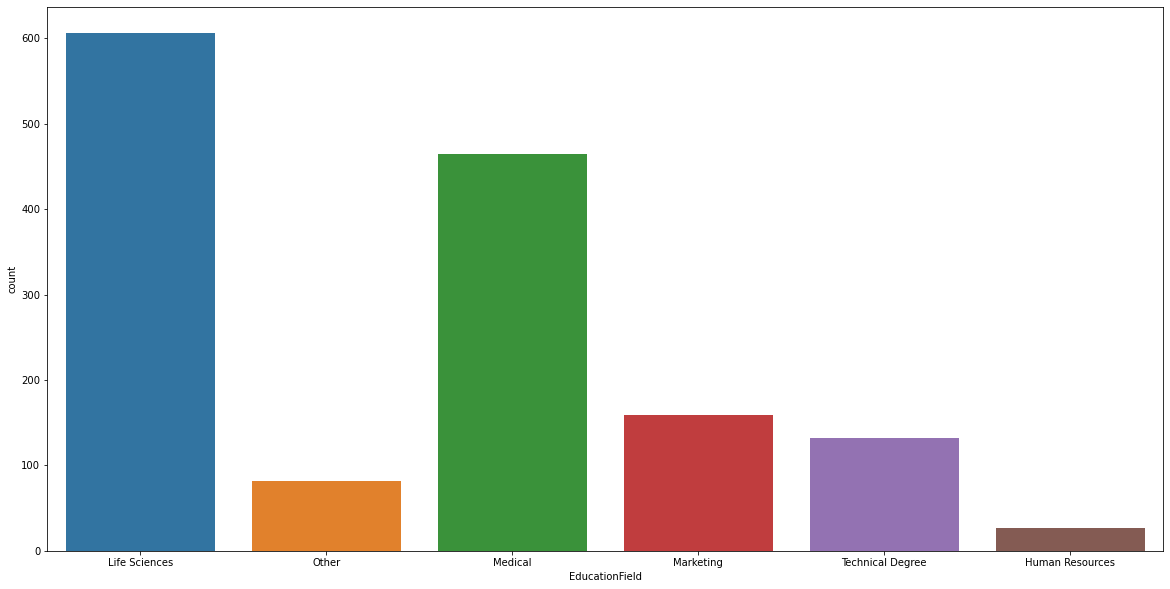

In [27]:
### Let's check difference fields.
plt.figure(figsize=(20,10))
sns.countplot(x = 'EducationField', data=data)
print(data['EducationField'].value_counts())

###### From above graph we can see that Life sciences and Medical education field employees are more then as compare to other education fields.

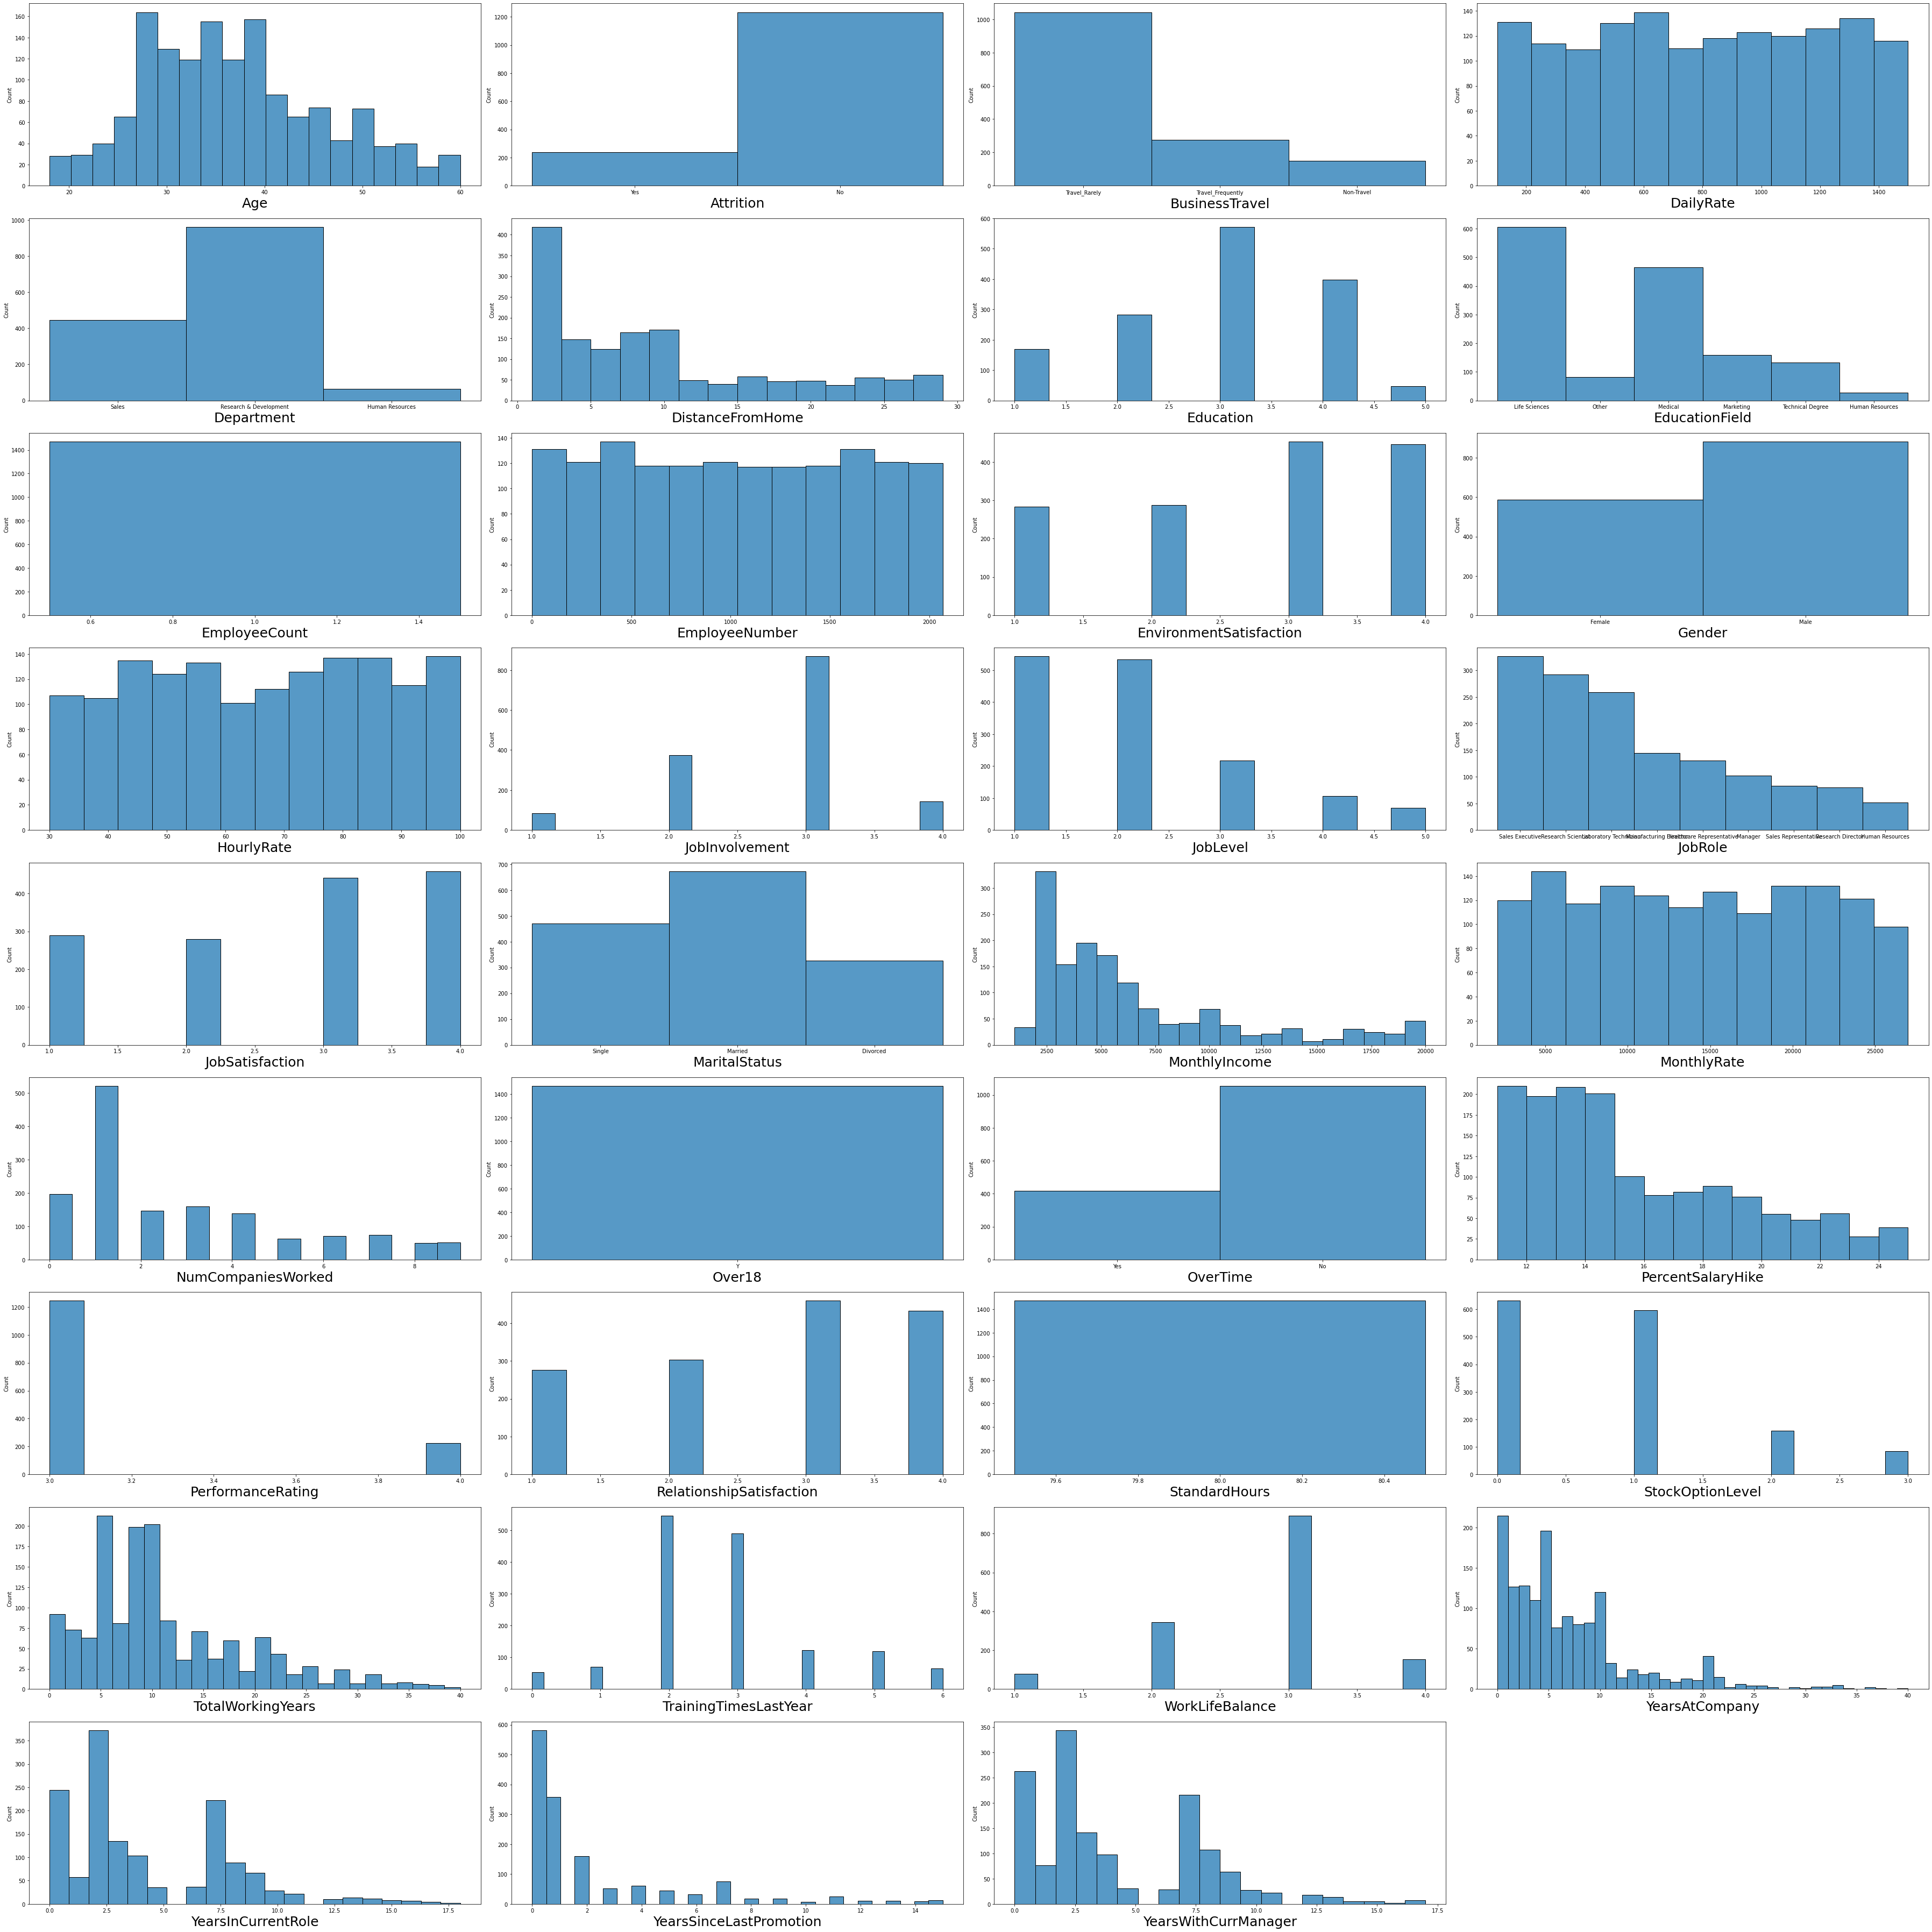

In [31]:
# Checking data distirution for all the features
plt.figure(figsize=(50,50), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 35:
        ax = plt.subplot(9,4,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

###### We have multiple columns which contain catogorical data we need to convert them to numeric data. Also we can see skewnnes in our data set.

### (ii) Biveriate analysis

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

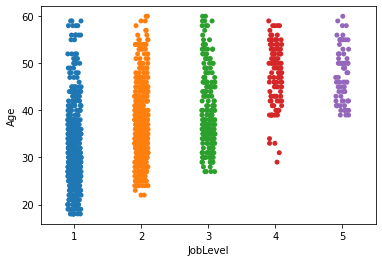

In [37]:
sns.stripplot(x = 'JobLevel', y = 'Age', data=data)

###### As the age increases job level also increases.

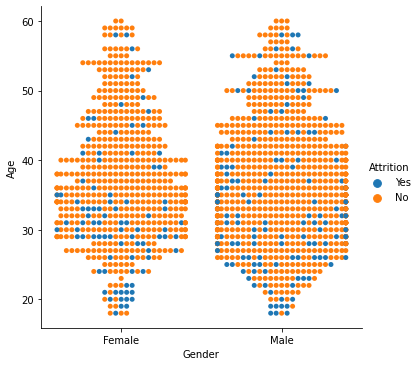

In [39]:
sns.catplot(x = 'Gender', y = 'Age',data=data,hue='Attrition',kind = 'swarm')

###### From above plot As we can see as your age increases the chances of Attrition is decreases.

#### converting our catagorical columns into numeric columns.

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['Over18'] = le.fit_transform(data['Over18'])
data['OverTime'] =le.fit_transform(data['OverTime'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])

In [75]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


### (iii) Multiveriate Analysis.

<AxesSubplot:>

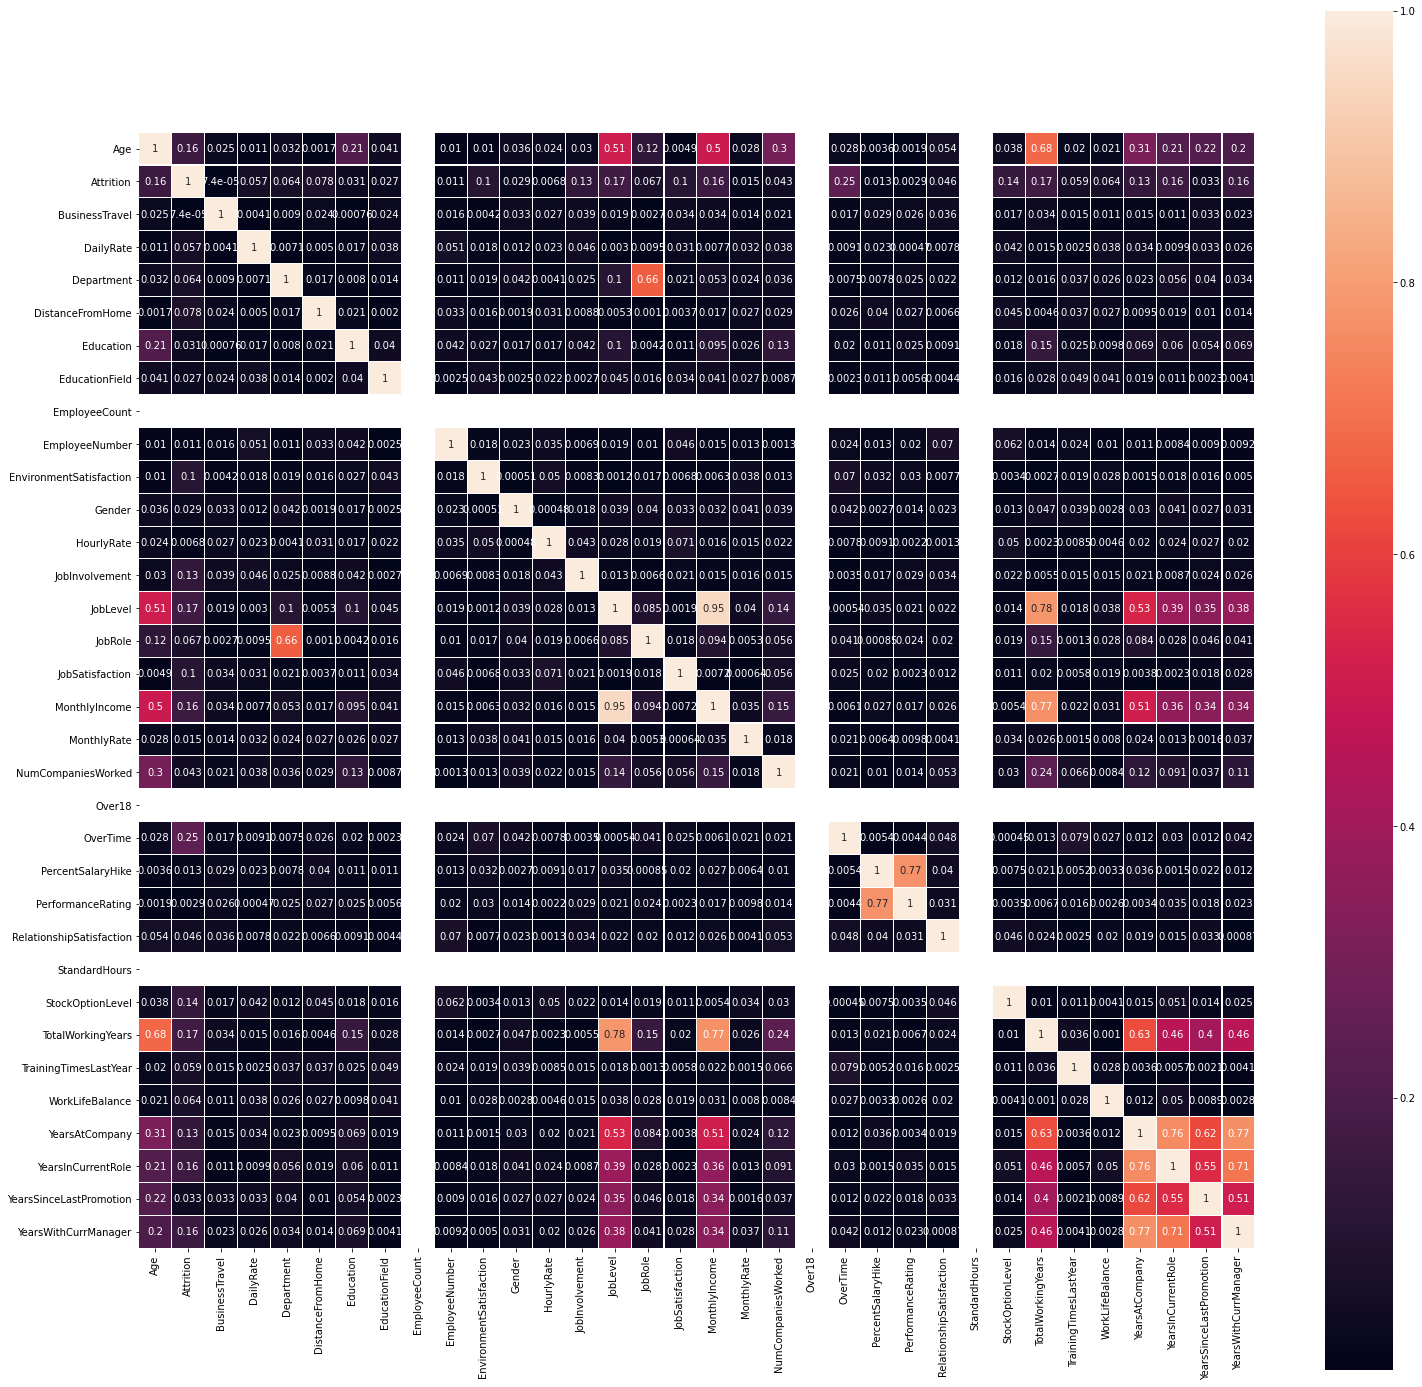

In [65]:
#### Checking Correlationship between  Features and Label, Also between Features and Features.
data_corr = data.corr().abs()
plt.figure(figsize=(25,25))
sns.heatmap(data_corr,linewidths=0.1,square=True,annot=True)

In [76]:
### Not able to understand Heatmap due to data size so lets check with the values.
data.drop('Attrition',axis=1).corrwith(data.Attrition).sort_values(ascending=False)

OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

###### we can see Last 3 columns Employeecount, Over 18, StandardHours does not show any relationship.
######  Overtime shows 24% percent relationship.

## Class Imbalancing 

In [78]:
x = data.drop('Attrition',axis=1)
y = data['Attrition']

In [79]:
# Now let's deal with Class imbalance problem.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new,y_new = sm.fit_resample(x,y)

### Selecting best features  for our model.

In [82]:
from sklearn.feature_selection import SelectPercentile, chi2

In [91]:
Spercentile = SelectPercentile(score_func=chi2, percentile=80)
Spercentile.fit(x_new,y_new)

SelectPercentile(percentile=80,
                 score_func=<function chi2 at 0x000001629851D670>)

In [92]:
### Seperating features to check  p-values
cols = Spercentile.get_support(indices=True)
features = x_new.columns[cols]

In [93]:
df_scores = pd.DataFrame({'features': x_new.columns,'Chi2_score':Spercentile.scores_,'Pvalue':Spercentile.pvalues_})
df_scores.sort_values(by='Chi2_score',ascending=False)

,features,Chi2_score,Pvalue
17,MonthlyIncome,583411.936724,0.000000e+00
2,DailyRate,3804.563000,0.000000e+00
27,TotalWorkingYears,1228.493583,3.916596e-269
30,YearsAtCompany,781.022606,7.213566e-172
8,EmployeeNumber,692.933436,1.028930e-152
31,YearsInCurrentRole,615.374871,7.580744e-136
33,YearsWithCurrManager,602.597696,4.558076e-133
0,Age,357.965213,7.810097e-80
26,StockOptionLevel,285.828017,4.032887e-64
13,JobLevel,147.966950,4.823428e-34


In [94]:
print(cols)
print(features)

[ 0  1  2  3  4  5  6  8  9 10 11 12 13 15 17 18 21 22 24 26 27 28 29 30
 31 32 33]
Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


 #### From above method its clear that about 80% of data will between this columns so will consider this columns only for our model building.

In [100]:
X = x_new[['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [101]:
X.head()### New X data with best features.

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,12,4,1,6,3,3,2,2,2,2


### Scaling (Standardization)

In [102]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(X)


### Train - Test Split

In [127]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_new,test_size=0.25,random_state=52)

In [111]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1849, 27) (1849,) (617, 27) (617,)


### Finding best model

In [112]:
## Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
#### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [129]:
confusion_matrix(y_test,y_lr_pred)

array([[252,  43],
       [ 68, 254]], dtype=int64)

In [131]:
accuracy_lr = classification_report(y_test,y_lr_pred)
print(accuracy_lr)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       295
           1       0.86      0.79      0.82       322

    accuracy                           0.82       617
   macro avg       0.82      0.82      0.82       617
weighted avg       0.82      0.82      0.82       617



In [134]:
cv_lr = cross_val_score(lr,x_scaled,y_new,cv=5).mean()
cv_lr

0.7981112087442823

In [136]:
#### Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt_pred = dt.predict(x_test)

In [137]:
confusion_matrix(y_test,y_dt_pred)

array([[232,  63],
       [ 66, 256]], dtype=int64)

In [138]:
accuracy_dt = classification_report(y_test,y_dt_pred)
print(accuracy_dt)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       295
           1       0.80      0.80      0.80       322

    accuracy                           0.79       617
   macro avg       0.79      0.79      0.79       617
weighted avg       0.79      0.79      0.79       617



In [139]:
cv_dt = cross_val_score(dt,x_scaled,y_new,cv=5).mean()

In [140]:
### SVC
svc = SVC()
svc.fit(x_train,y_train)
y_svc_pred = svc.predict(x_test)

In [141]:
confusion_matrix(y_test,y_svc_pred)

array([[271,  24],
       [ 44, 278]], dtype=int64)

In [142]:
accuracy_svc = classification_report(y_test,y_svc_pred)
print(accuracy_svc)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       295
           1       0.92      0.86      0.89       322

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617



In [155]:
cv_svc = cross_val_score(svc,x_scaled,y_new,cv=5).mean()

In [144]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)

In [145]:
confusion_matrix(y_test,y_rf_pred)

array([[274,  21],
       [ 42, 280]], dtype=int64)

In [147]:
accuracy_rf = classification_report(y_test,y_rf_pred)
print(accuracy_rf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       295
           1       0.93      0.87      0.90       322

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617



In [154]:
cv_rf = cross_val_score(rf,x_scaled,y_new,cv=5).mean()

In [149]:
### K-Neighbors Classifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_knn_pred = kn.predict(x_test)

In [150]:
confusion_matrix(y_test,y_knn_pred)

array([[207,  88],
       [ 11, 311]], dtype=int64)

In [151]:
accuracy_kn = classification_report(y_test,y_knn_pred)
print(accuracy_kn)

              precision    recall  f1-score   support

           0       0.95      0.70      0.81       295
           1       0.78      0.97      0.86       322

    accuracy                           0.84       617
   macro avg       0.86      0.83      0.83       617
weighted avg       0.86      0.84      0.84       617



In [153]:
cv_kn = cross_val_score(kn,x_scaled,y_new,cv=5).mean()

In [156]:
print('LogisticRegression acc = ',accuracy_lr,'\n CV score = ',cv_lr,'\n')
print('DecisionTreeClassifier acc = ',accuracy_dt,'\n CV score = ',cv_dt,'\n')
print('SVC  acc = ',accuracy_svc,'\n CV score = ',cv_svc,'\n')
print('RandomForestClassifier acc = ',accuracy_rf,'\n CV score = ',cv_rf,'\n')
print('KNeighborsClassifier acc = ',accuracy_kn,'\n CV score = ',cv_kn,'\n')

LogisticRegression acc =                precision    recall  f1-score   support

           0       0.79      0.85      0.82       295
           1       0.86      0.79      0.82       322

    accuracy                           0.82       617
   macro avg       0.82      0.82      0.82       617
weighted avg       0.82      0.82      0.82       617
 
 CV score =  0.7981112087442823 

DecisionTreeClassifier acc =                precision    recall  f1-score   support

           0       0.78      0.79      0.78       295
           1       0.80      0.80      0.80       322

    accuracy                           0.79       617
   macro avg       0.79      0.79      0.79       617
weighted avg       0.79      0.79      0.79       617
 
 CV score =  0.6229652380287589 

SVC  acc =                precision    recall  f1-score   support

           0       0.86      0.92      0.89       295
           1       0.92      0.86      0.89       322

    accuracy                           0.89 

#### Out of 5 model Random Forest Classifier is our best model, Becuase its given as acc 90% and Cross validatiion score 83%. therefore its our best model.

### Let's find ROC_AUC_Scrore`

In [159]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [160]:
#### Logistic Regression
roc_auc_score(y_test,y_lr_pred)

0.8215285819559954

In [161]:
#### Decision Tree Classifier
roc_auc_score(y_test,y_dt_pred)

0.7907358669333615

In [162]:
#### SVC  
roc_auc_score(y_test,y_svc_pred)

0.8909990525318454

In [163]:
#### Random Forest Classifier 
roc_auc_score(y_test,y_rf_pred)

0.8991893883566691

In [164]:
### K-Neighbors Classifier
roc_auc_score(y_test,y_knn_pred)

0.8337667122855039

### Let's PLOT roc_auc curve for our model

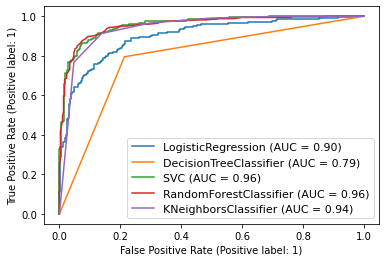

In [165]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_) # Here ax_ means axes with confusion matrix
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11},loc = 'lower right')
plt.show()

##### With roc_auc_curve we can see that Random forest Classifier is covering 96% of test dataset. So for this dataset Random forest Classifier is best model.

## Hyper parameter tuning using GridSearchCV

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
params = {'n_estimators':np.arange(100,200,10),
          'criterion':['gini','entropy'],
          'max_depth':[11],
          'min_samples_split':np.arange(2,11,2),
          'max_features':['auto','sqrt','log2']}

In [168]:
gridsearch = GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)

In [ ]:
gridsearch.fit(x_train,y_train)